In [69]:
import io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [44]:
Data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
Data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
Data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
Data.shape

(158, 12)

In [11]:
Data.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [ ]:
#Two columns are string and needed to be converted to Numeric

In [15]:
Data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
#There are no missing values in the dataset

<AxesSubplot:xlabel='Trust (Government Corruption)'>

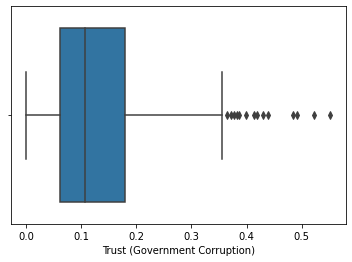

In [57]:
sns.boxplot(x=Data["Trust (Government Corruption)"])

<AxesSubplot:xlabel='Family'>

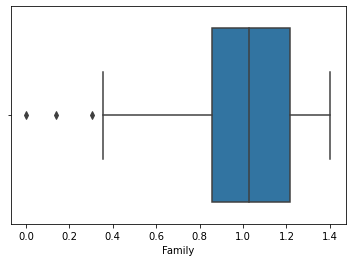

In [63]:
sns.boxplot(x=Data["Family"])

In [ ]:
# can see that there are outliers in Trust (Government Corruption)-Left Skewed, Family, GDP and Health are right Skewed.

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Density'>

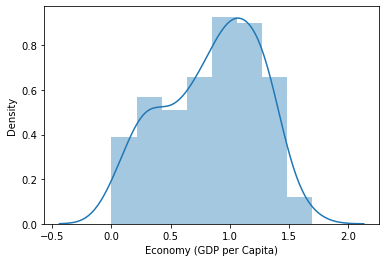

In [29]:
sns.distplot(Data["Economy (GDP per Capita)"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Family', ylabel='Density'>

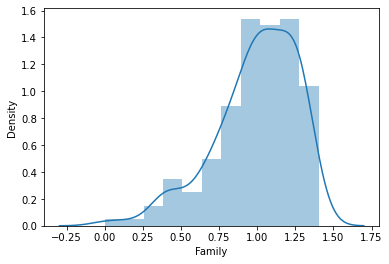

In [30]:
sns.distplot(Data["Family"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Density'>

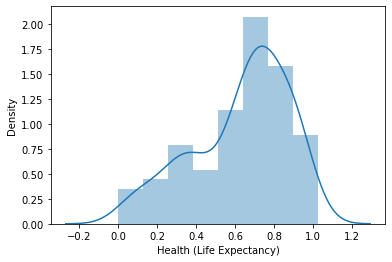

In [62]:
sns.distplot(Data["Health (Life Expectancy)"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Freedom', ylabel='Density'>

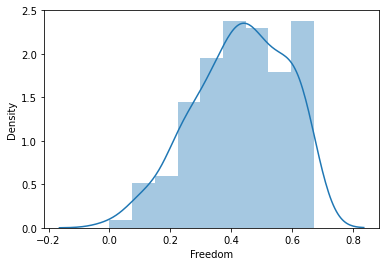

In [32]:
sns.distplot(Data["Freedom"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

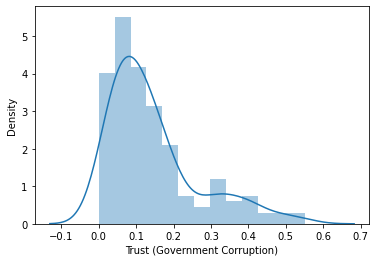

In [33]:
sns.distplot(Data["Trust (Government Corruption)"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Generosity', ylabel='Density'>

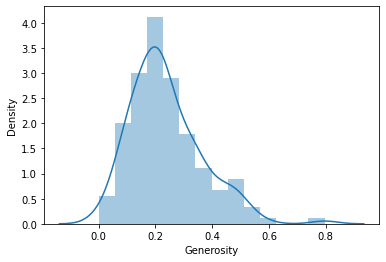

In [34]:
sns.distplot(Data["Generosity"])

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

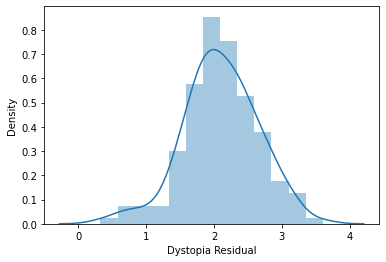

In [35]:
sns.distplot(Data["Dystopia Residual"])

In [47]:
from sklearn.preprocessing import LabelEncoder

CC=LabelEncoder()
Data["Country"]=CC.fit_transform(Data["Country"])
Data["Country"].unique()

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141])

In [ ]:
#Converted country to Numeric from   String using LE

In [48]:
Data["Region"]=CC.fit_transform(Data["Region"])
Data["Region"].unique()

array([9, 5, 0, 4, 3, 6, 1, 2, 8, 7])

In [ ]:
# Converted Region to Numeric  using LE

In [210]:
from scipy.stats import zscore
ZS=zscore(Data)
New_Data=Data[(ZS<0.4).all(axis=1)]

In [211]:
New_Data.shape

(2, 12)

C:\Users\Pradeep\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Density'>

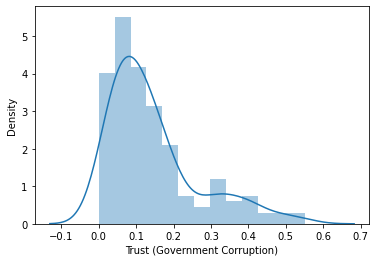

In [51]:
sns.distplot(Data["Trust (Government Corruption)"])

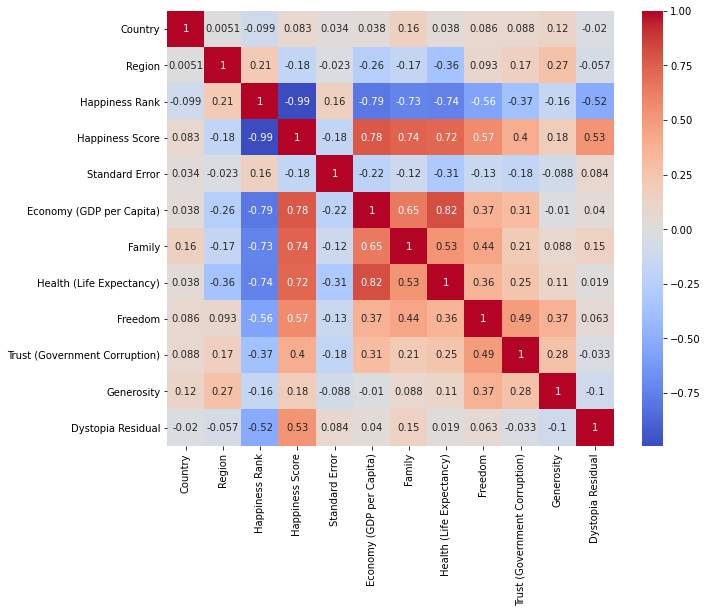

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(), cmap='coolwarm', annot=True);

In [75]:
DataNew=Data.drop("Health (Life Expectancy)",axis=1)

In [125]:
Data.shape

(158, 12)

In [78]:
DataNew.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [83]:
from scipy.stats import zscore
zs=zscore(DataNew)
Data1=DataNew[(zs<0.4).all(axis=1)]

In [89]:
Data1.shape

(4, 11)

In [222]:
DataNew.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                           0.170804
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

In [212]:
DataNew.shape

(158, 11)

# Resolving Skewness

In [127]:
DataNew["Standard Error"]=np.log(DataNew["Standard Error"])



In [141]:
DataNew["Generosity"]=np.sqrt(Data["Generosity"])

In [143]:
DataNew["Trust (Government Corruption)"]=np.sqrt(DataNew["Trust (Government Corruption)"])

In [185]:
DataNew["Family"]=np.power(DataNew["Family"],3)

# Seperating Feature and Target

In [187]:
features=DataNew.drop("Happiness Score",axis=1)
target=DataNew["Happiness Score"]

# Scaling- Min Max scalar

In [188]:
from sklearn.preprocessing import MinMaxScaler
MM=MinMaxScaler()
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [189]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    LR.fit(features_train,target_train)
    pred_train=LR.predict(features_train)
    pred_test=LR.predict(features_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.9918645410481848
At random state 0,the testing accuracy is:- 0.9868298598196789


At random state 1,the training accuracy is:- 0.9919119069816785
At random state 1,the testing accuracy is:- 0.9891399842846158


At random state 2,the training accuracy is:- 0.9909891214554611
At random state 2,the testing accuracy is:- 0.9925050068259597


At random state 3,the training accuracy is:- 0.9914587444774147
At random state 3,the testing accuracy is:- 0.9909458389927518


At random state 4,the training accuracy is:- 0.9899847900247952
At random state 4,the testing accuracy is:- 0.9947028908741788


At random state 5,the training accuracy is:- 0.9916152110925793
At random state 5,the testing accuracy is:- 0.9890939777399297


At random state 6,the training accuracy is:- 0.9914222828584053
At random state 6,the testing accuracy is:- 0.9903327394991204


At random state 7,the training accuracy is:- 0.9926505124807367
At random state 7,the testing acc

At random state 69,the training accuracy is:- 0.9930058145956004
At random state 69,the testing accuracy is:- 0.9841407140518176


At random state 70,the training accuracy is:- 0.9912035395015513
At random state 70,the testing accuracy is:- 0.9920426817787948


At random state 71,the training accuracy is:- 0.9924273102092921
At random state 71,the testing accuracy is:- 0.9844731759852663


At random state 72,the training accuracy is:- 0.991461275274132
At random state 72,the testing accuracy is:- 0.990541478773837


At random state 73,the training accuracy is:- 0.9927665739439326
At random state 73,the testing accuracy is:- 0.9857091561812382


At random state 74,the training accuracy is:- 0.9926242670407711
At random state 74,the testing accuracy is:- 0.9867266159153657


At random state 75,the training accuracy is:- 0.9913364819799314
At random state 75,the testing accuracy is:- 0.9913670940917509


At random state 76,the training accuracy is:- 0.9914092921650706
At random state 76,t

In [190]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=75)

In [191]:
LR.fit(features_train,target_train)


LinearRegression()

In [192]:
pred_test=LR.predict(features_test)

In [193]:
print(r2_score(target_test,pred_test))

0.9913670940917509


In [214]:
Accuracy_Train=r2_score(target_train,pred_train)
Accuracy_Test=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cvscore=cross_val_score(LR,features,target,cv=j)
    cvmean=cvscore.mean()
    print(f"At cross fold {j} the cv score is {cvmean} and accuracy score for training is {Accuracy_Train} and accuracy for the testing is {Accuracy_Test}")
    print("\n")

At cross fold 2 the cv score is 0.9171278275309327 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 3 the cv score is 0.9195067851856805 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 4 the cv score is 0.779680066597843 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 5 the cv score is 0.646388920320452 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 6 the cv score is 0.5045671141456256 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 7 the cv score is 0.36426028764554325 and accuracy score for training is -1.2816704706753068 and accuracy for the testing is 0.9913670940917509


At cross fold 8 the cv score is 0.2821069174453

In [104]:
#Since no change in accuracy with folds we can choose CV=5

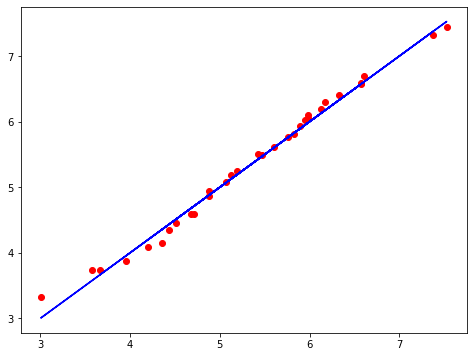

In [196]:
plt.figure(figsize=(8,6))
plt.scatter(x=target_test, y=pred_test, color='r')
plt.plot(target_test,target_test, color='b')

# Regularisation

In [197]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [198]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
Las= Lasso()
FitParameters= GridSearchCV(Las,parameters)
FitParameters.fit(features_train,target_train)

print(FitParameters.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [199]:
Las = Lasso(alpha=.0001,random_state=0)
Las.fit(features_train,target_train)
Las.score(features_train,target_train)
pred_lasso = Las.predict(features_test)

Lasso = r2_score(target_test,pred_lasso)
Lasso

0.9912155914253497

In [215]:
cvscore=cross_val_score(Las,features,target,cv=2)
cvmean=cvscore.mean()
cvmean

0.9101298106145386

# Ensemble Technique - Random Forest

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
FitParameters = GridSearchCV(rf,parameters)
FitParameters.fit(features_train,target_train)

print(FitParameters.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [239]:
rf= RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features_train,target_train,cv=3)
rfc = rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score: 99.51216575021563
Cross Val Score: 98.87869850737324


# Decision Tree

In [224]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'best'}


In [244]:
DTR = DecisionTreeRegressor(criterion='friedman_mse', splitter='best')
DTR.fit(features_train,target_train)
DTR.score(features_train,target_train)
pred_decision = DTR.predict(features_test)

dts = r2_score(target_test,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(DTR,features_train,target_train,cv=3)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 99.21279133891679
Cross Val Score: 98.32545409469856


In [ ]:
#Conclusion is that the Random Forest Algorithm works slightly better than the DTC.

In [252]:
import pickle
filename = 'WH.pkl'
pickle.dump(RF, open(filename, 'wb'))

In [255]:
import numpy as np
a=np.array(target_test)
a

array([3.956, 4.715, 5.129, 6.574, 4.507, 4.876, 5.605, 7.378, 6.168,
       5.474, 5.429, 5.828, 5.984, 4.681, 3.575, 3.006, 6.575, 5.987,
       4.194, 5.073, 5.192, 4.874, 7.527, 5.754, 6.611, 6.329, 5.889,
       4.436, 6.123, 4.35 , 5.948, 3.667])

In [256]:
predicted=np.array(rf.predict(features_test))
predicted

array([3.96598, 4.73975, 5.14329, 6.51134, 4.51765, 4.88242, 5.66334,
       7.3926 , 6.26781, 5.50571, 5.4157 , 5.84313, 5.97355, 4.6968 ,
       3.48508, 3.35341, 6.6244 , 5.99864, 4.17961, 5.10723, 5.20248,
       4.85352, 7.50231, 5.74564, 6.72621, 6.3994 , 5.88125, 4.45713,
       6.08993, 4.32506, 5.94835, 3.61592])

In [259]:
conclusion=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))


In [260]:
conclusion

,original,predicted
0,3.956,3.96598
1,4.715,4.73975
2,5.129,5.14329
3,6.574,6.51134
4,4.507,4.51765
5,4.876,4.88242
6,5.605,5.66334
7,7.378,7.39260
8,6.168,6.26781
9,5.474,5.50571
